# 1. Data Collection and Exploration

In [3]:
# Import required libraries
import pandas as pd
import numpy as np

In [4]:
# Load the datasets
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

In [5]:
# Show first 5 rows of each dataset
print("Movies dataset:")
print(movies.head(), "\n\n")

print("Credits dataset:")
print(credits.head(), "\n")

Movies dataset:
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [

In [6]:
# Explore basic info (columns, datatypes, null values)
print("Movies dataset info:")
print(movies.info(), "\n")

print("Credits dataset info:")
print(credits.info(), "\n")

Movies dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  

In [7]:
# Check shapes (rows, columns)
print("Movies shape:", movies.shape)
print("Credits shape:", credits.shape)

Movies shape: (4803, 20)
Credits shape: (4803, 4)


In [8]:
# Check for missing values
print("Missing values in movies:")
print(movies.isnull().sum(), "\n")

print("Missing values in credits:")
print(credits.isnull().sum(), "\n")

Missing values in movies:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64 

Missing values in credits:
movie_id    0
title       0
cast        0
crew        0
dtype: int64 



In [9]:
# Check for duplicates
print("Duplicate rows in movies:", movies.duplicated().sum())
print("Duplicate rows in credits:", credits.duplicated().sum())

Duplicate rows in movies: 0
Duplicate rows in credits: 0


# 2. Data Cleaning and Transformation

In [10]:
import ast

In [11]:
# Step 2.1: Merge datasets on "title"
movies = movies.merge(credits, on="title")

# Keep only useful columns
movies = movies[["movie_id", "title", "overview", "genres", "keywords", "cast", "crew"]]
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
# Step 2.2: Handle missing values
print("Missing values before cleaning:")
print(movies.isnull().sum(), "\n")

Missing values before cleaning:
movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64 



In [13]:
# Drop rows with null values in important columns
movies.dropna(inplace=True)

print("Missing values after cleaning:")
print(movies.isnull().sum(), "\n")

Missing values after cleaning:
movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64 



In [14]:
# Step 2.3: Handle duplicates
print("Duplicate rows:", movies.duplicated().sum())
movies.drop_duplicates(inplace=True)

Duplicate rows: 0


In [15]:
# Step 2.4: Transform JSON-like strings into lists
def convert(obj):
    """Convert JSON-like string into list of names."""
    L = []
    for i in ast.literal_eval(obj):
        L.append(i["name"])
    return L

def top_cast(obj):
    """Extract top 3 cast members."""
    L = []
    for i in ast.literal_eval(obj)[:3]:
        L.append(i["name"])
    return L

def fetch_director(obj):
    """Extract director from crew column."""
    for i in ast.literal_eval(obj):
        if i["job"] == "Director":
            return [i["name"]]
    return []

movies["genres"] = movies["genres"].apply(convert)
movies["keywords"] = movies["keywords"].apply(convert)
movies["cast"] = movies["cast"].apply(top_cast)
movies["crew"] = movies["crew"].apply(fetch_director)

In [16]:
# Step 2.5: Clean overview column
movies["overview"] = movies["overview"].fillna("")

In [17]:
# Step 2.6: Create a new feature "tags"
movies["tags"] = (
    movies["overview"] + " " +
    movies["genres"].apply(lambda x: " ".join(x)) + " " +
    movies["keywords"].apply(lambda x: " ".join(x)) + " " +
    movies["cast"].apply(lambda x: " ".join(x)) + " " +
    movies["crew"].apply(lambda x: " ".join(x))
)

In [18]:
# Final check
print("Final dataset shape:", movies.shape)
movies.head()

Final dataset shape: (4806, 8)


,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],"John Carter is a war-weary, former military ca..."


# 3. Exploratory Data Analysis (EDA)

In [19]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\97798\AppData\Local\Temp\ipykernel_8532\1435435219.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values[:10], y=genre_counts.index[:10], palette="viridis")


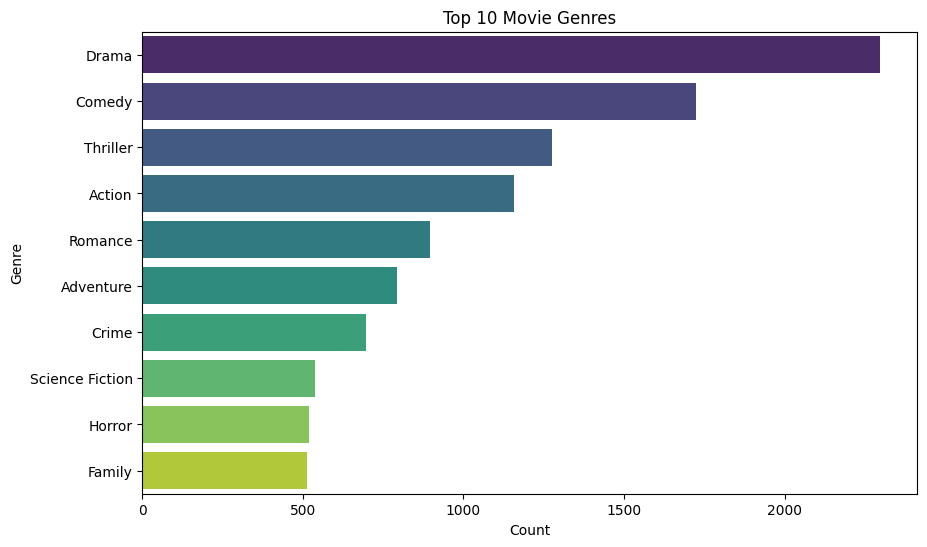

In [22]:
# Step 3.1: Distribution of Genres
all_genres = sum(movies['genres'], [])  # flatten list of genres
genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values[:10], y=genre_counts.index[:10], palette="viridis")
plt.title("Top 10 Movie Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

C:\Users\97798\AppData\Local\Temp\ipykernel_8532\2426065300.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword_counts.values[:10], y=keyword_counts.index[:10], palette="magma")


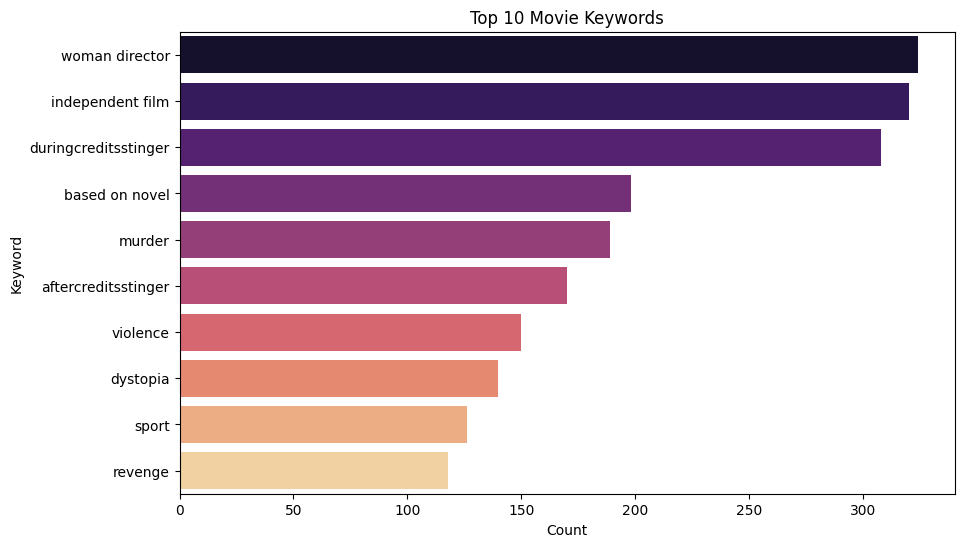

In [23]:
# Step 3.2: Distribution of Keywords
all_keywords = sum(movies['keywords'], [])
keyword_counts = pd.Series(all_keywords).value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=keyword_counts.values[:10], y=keyword_counts.index[:10], palette="magma")
plt.title("Top 10 Movie Keywords")
plt.xlabel("Count")
plt.ylabel("Keyword")
plt.show()

C:\Users\97798\AppData\Local\Temp\ipykernel_8532\3190658029.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cast_counts.values[:10], y=cast_counts.index[:10], palette="cubehelix")


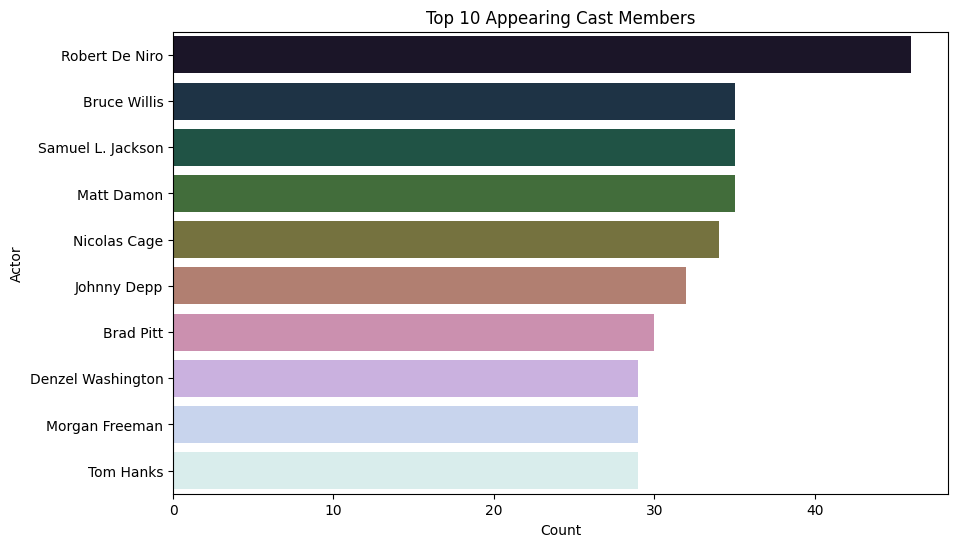

In [24]:
# Step 3.3: Cast frequency (top actors)
all_cast = sum(movies['cast'], [])
cast_counts = pd.Series(all_cast).value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=cast_counts.values[:10], y=cast_counts.index[:10], palette="cubehelix")
plt.title("Top 10 Appearing Cast Members")
plt.xlabel("Count")
plt.ylabel("Actor")
plt.show()

C:\Users\97798\AppData\Local\Temp\ipykernel_8532\1988501392.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.values[:10], y=director_counts.index[:10], palette="coolwarm")


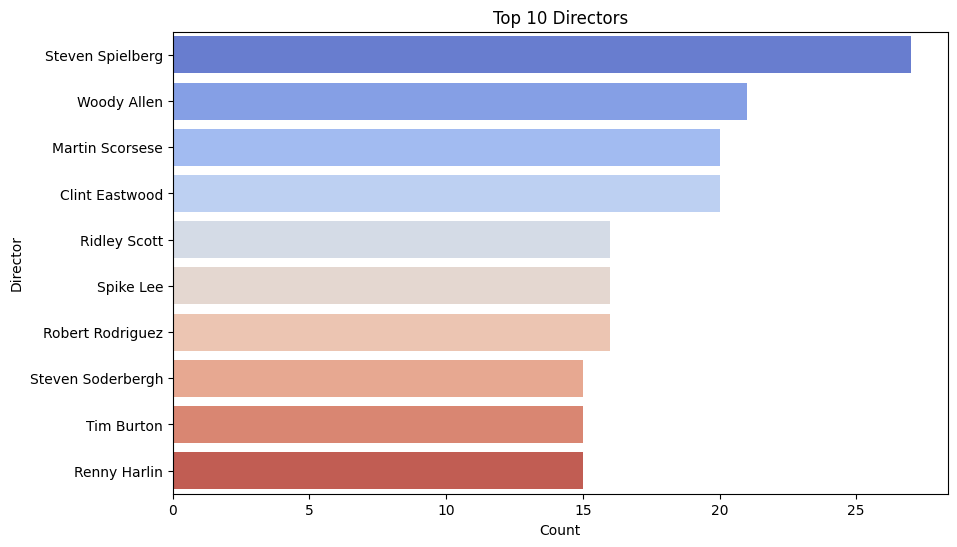

In [25]:
# Step 3.4: Director frequency
all_directors = sum(movies['crew'], [])
director_counts = pd.Series(all_directors).value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=director_counts.values[:10], y=director_counts.index[:10], palette="coolwarm")
plt.title("Top 10 Directors")
plt.xlabel("Count")
plt.ylabel("Director")
plt.show()

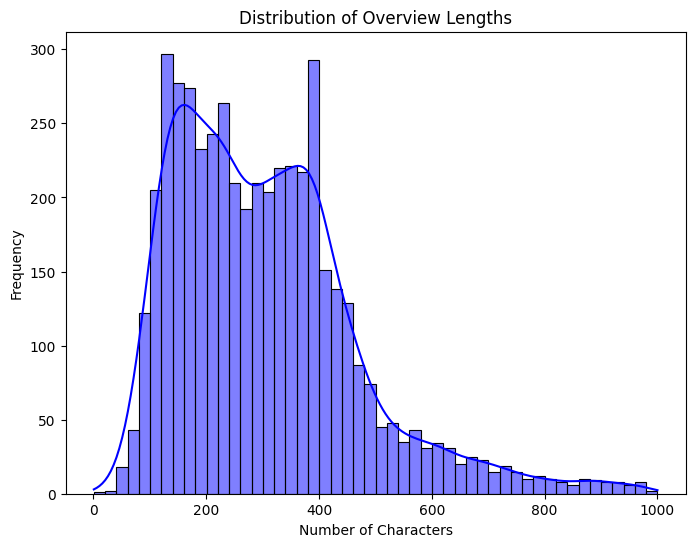

In [26]:
# Step 3.5: Overview (description) length distribution
movies['overview_length'] = movies['overview'].apply(len)

plt.figure(figsize=(8,6))
sns.histplot(movies['overview_length'], bins=50, kde=True, color="blue")
plt.title("Distribution of Overview Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

# 4. Feature Selection

In [27]:
# Step 4.1: Select features
selected_features = movies[["movie_id", "title", "overview", "genres", "keywords", "cast", "crew"]]
print("Selected features:", selected_features.columns.tolist())

Selected features: ['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew']


In [28]:
# Step 4.2: Create the 'tags' column (already done in cleaning, but ensure it exists)
movies['tags'] = (
    movies['overview'] + " " +
    movies['genres'].apply(lambda x: " ".join(x)) + " " +
    movies['keywords'].apply(lambda x: " ".join(x)) + " " +
    movies['cast'].apply(lambda x: " ".join(x)) + " " +
    movies['crew'].apply(lambda x: " ".join(x))
)

In [29]:
# Step 4.3: Final dataframe for modeling
final_df = movies[["movie_id", "title", "tags"]]
print(final_df.head())

   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                tags  
0  In the 22nd century, a paraplegic Marine is di...  
1  Captain Barbossa, long believed to be dead, ha...  
2  A cryptic message from Bond’s past sends him o...  
3  Following the death of District Attorney Harve...  
4  John Carter is a war-weary, former military ca...  


# 5. Model Development

In [36]:
pip install nltk


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [51]:
import nltk
from nltk.stem.porter import PorterStemmer

# Create a stemmer instance
ps = PorterStemmer()

# Function to apply stemming
def stem(text):
    y = []

    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)    


In [52]:
movies['tags'] = movies['tags'].apply(lambda x: x.lower())   # lowercase
movies['tags'] = movies['tags'].apply(stem)                  # stemming


In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [54]:
# Step 5.1: Vectorize the 'tags' column
cv = CountVectorizer(max_features=5000, stop_words='english')
vectors = cv.fit_transform(movies['tags']).toarray()

In [55]:
# Step 5.2: Compute cosine similarity
similarity = cosine_similarity(vectors)

print("Similarity matrix shape:", similarity.shape)

Similarity matrix shape: (4806, 4806)


In [56]:
# Step 5.3: Define recommend function
def recommend(movie):
    idx = movies[movies['title'] == movie].index[0]
    distances = similarity[idx]
    movie_list = sorted(list(enumerate(similarity[0])), reverse=True, key=lambda x: x[1])[1:6]
    for i in movie_list:
        print(movies.iloc[i[0]].title)
    return    

In [57]:
# Test
recommend("Avatar")

Aliens
Silent Running
Moonraker
Alien
Mission to Mars


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Try TF-IDF instead of CountVectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words="english")
vectors_tfidf = tfidf.fit_transform(movies['tags']).toarray()

# Compute similarity with TF-IDF
similarity_tfidf = cosine_similarity(vectors_tfidf)

# Compare recommend outputs
def recommend(movie, similarity_matrix):
    idx = movies[movies['title'] == movie].index[0]
    distances = similarity_matrix[idx]
    movie_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]
    return [movies.iloc[i[0]].title for i in movie_list]

print("Using CountVectorizer:", recommend("Avatar", similarity) )
print("Using TF-IDF:", recommend("Avatar", similarity_tfidf) )


Using CountVectorizer: ['Aliens', 'Moonraker', 'Alien', 'Alien³', 'Silent Running']
Using TF-IDF: ['Aliens', 'Alien', 'Moonraker', 'Alien³', 'Silent Running']
